### Checking the path of the current directory

In [1]:
cd D:\Documents\Python\Python_tutorial\DataScience (tutorial)\Practice Files\Data Set

D:\Documents\Python\Python_tutorial\DataScience (tutorial)\Practice Files\Data Set


### Importing the Libraries

In [2]:
import numpy as np
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
%matplotlib inline
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')
import scipy

### Checking the versions of the libraries

In [3]:
print('Python :{}'.format(sys.version))
print('Numpy :{}'.format(np.__version__))
print('Pandas :{}'.format(pd.__version__))
print('Matplotlib :{}'.format(matplotlib.__version__))
print('Seaborn :{}'.format(sns.__version__))
print('Scipy :{}'.format(scipy.__version__))

Python :3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Numpy :1.18.1
Pandas :1.0.1
Matplotlib :3.1.3
Seaborn :0.10.0
Scipy :1.4.1


### Importing the dataset from the CSV File and checking first five rows

In [4]:
df=pd.read_csv("breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Keeping a backup of the original dataset before feature engineering

In [5]:
final=df.copy()
final

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Checking the distinct values of the target variable

In [6]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### Code to check the null values in the columns

In [7]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Dropping Column 'ID' from the dataset

In [9]:
df.drop(['id'],axis=1,inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Replacing the target values with integers
If the value is 'M' or Malignant, the integer value will be 1 and if it is 'B' or Benign, the value will be 0.

In [10]:
diag_target=[]
for i in df['diagnosis']:
    if(i=='M'):
        diag_target.append(1);
    elif(i=='B'):
        diag_target.append(0);
        
diag_target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,


### Creating a new column 'diag_target' of the dataset

In [11]:
df['diag_target']=diag_target
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diag_target
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Dropping the column 'diagnosis' from the dataset as it is of no use now and being replaced by the column 'diag_target'

In [13]:
df.drop(['diagnosis'],axis=1,inplace=True)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diag_target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


### Measuring the central tendency of the data

In [14]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diag_target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Visualization of the frequency distribution of all the features using Histogram

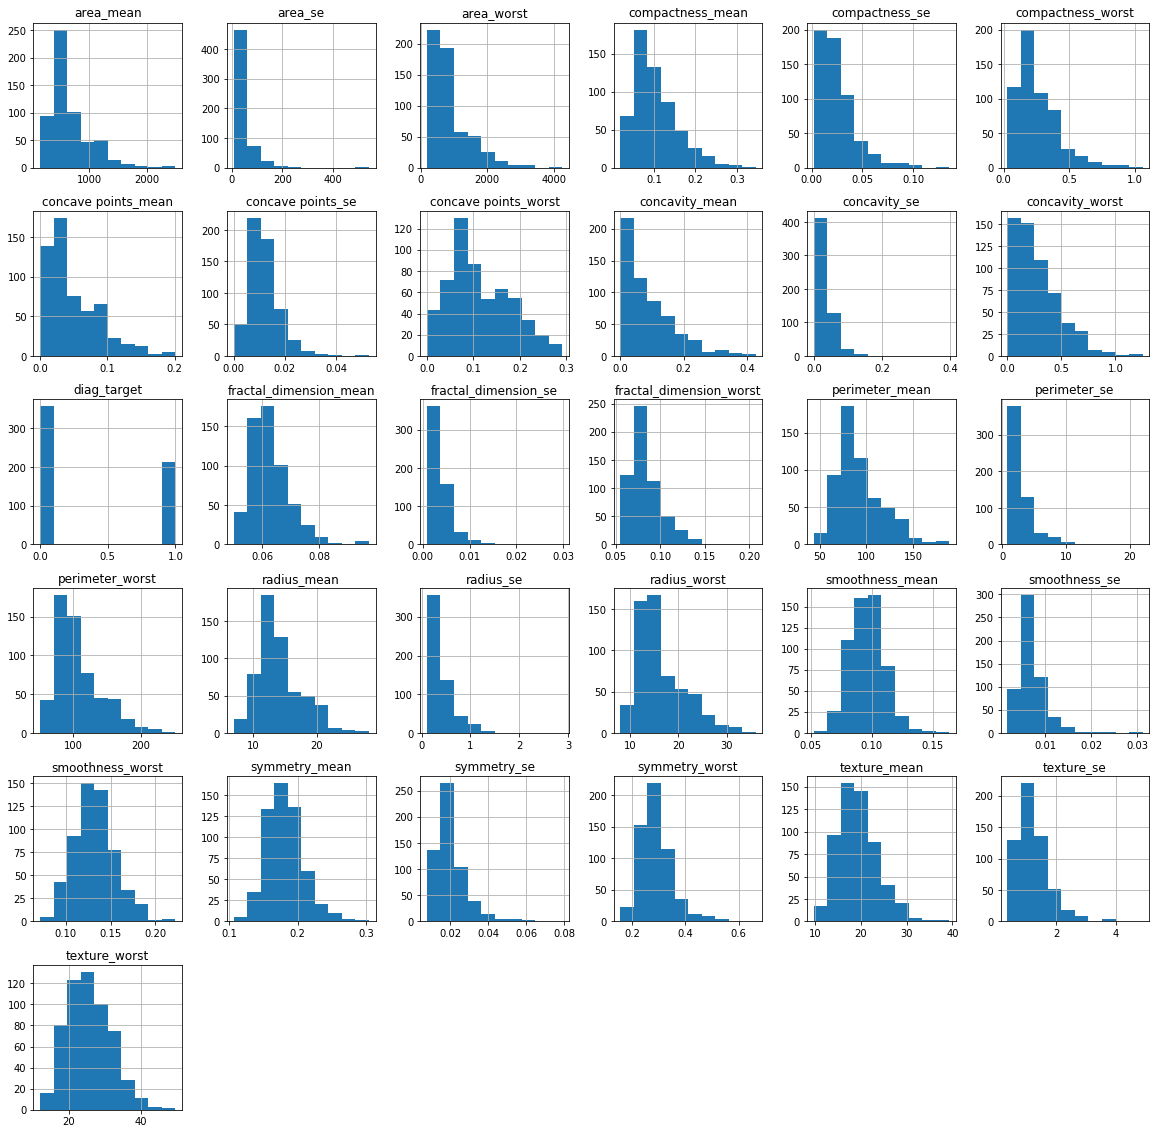

In [15]:
df.hist(figsize=(20,20))
plt.show()

### Checking the distinct values of the target variable

In [16]:
df['diag_target'].value_counts()

0    357
1    212
Name: diag_target, dtype: int64

### Creating a dataframe where the target variale is 0.

In [17]:
df_not_malignant = df[df['diag_target']==0]

### Creating a dataframe where the target variale is 1.

In [18]:
df_malignant = df[df['diag_target']==1]

Since there is a difference between the two classes of the target variable, resampling is being conducted as it is an imbalanced dataset. Imbalanced dataset can affect the accuracy of the model.

In [19]:
df_not_malignant_downsampled = resample(df_not_malignant,replace=False,n_samples=200,random_state=42)
len(df_not_malignant_downsampled)

200

In [20]:
df_malignant_downsampled = resample(df_malignant,replace=False,n_samples=200,random_state=42)
len(df_malignant_downsampled)

200

In [21]:
df_downsample = pd.concat([df_not_malignant_downsampled,df_malignant_downsampled])
len(df_downsample)

400

In [22]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [23]:
X=df_downsample.iloc[:,:-1]
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
395,14.060,17.18,89.75,609.1,0.08045,0.05361,0.026810,0.03251,0.1641,0.05764,...,14.92,25.34,96.42,684.5,0.10660,0.12310,0.08460,0.07911,0.2523,0.06609
110,9.777,16.99,62.50,290.2,0.10370,0.08404,0.043340,0.01778,0.1584,0.07065,...,11.05,21.47,71.68,367.0,0.14670,0.17650,0.13000,0.05334,0.2533,0.08468
481,13.900,19.24,88.73,602.9,0.07991,0.05326,0.029950,0.02070,0.1579,0.05594,...,16.41,26.42,104.40,830.5,0.10640,0.14150,0.16730,0.08150,0.2356,0.07603
493,12.460,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.06013,...,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
136,11.710,16.67,74.72,423.6,0.10510,0.06095,0.035920,0.02600,0.1339,0.05945,...,13.33,25.48,86.16,546.7,0.12710,0.10280,0.10460,0.06968,0.1712,0.07343


In [24]:
y=df_downsample.iloc[:,-1]
y.head()

395    0
110    0
481    0
493    0
136    0
Name: diag_target, dtype: int64

### Splitting the dataset into test and train set

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [26]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
493,12.46,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.06013,...,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.0268,0.2280,0.07028
284,12.89,15.70,84.08,516.6,0.07818,0.09580,0.111500,0.03390,0.1432,0.05935,...,13.90,19.69,92.12,595.6,0.09926,0.23170,0.33440,0.1017,0.1999,0.07127
274,17.93,24.48,115.20,998.9,0.08855,0.07027,0.056990,0.04744,0.1538,0.05510,...,20.92,34.69,135.10,1320.0,0.13150,0.18060,0.20800,0.1136,0.2504,0.07948
27,18.61,20.25,122.10,1094.0,0.09440,0.10660,0.149000,0.07731,0.1697,0.05699,...,21.31,27.26,139.90,1403.0,0.13380,0.21170,0.34460,0.1490,0.2341,0.07421
512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.144500,0.08172,0.2116,0.07325,...,16.41,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.2051,0.3585,0.11090


In [27]:
X_train.shape

(320, 30)

In [28]:
X_test.shape

(80, 30)

# Decision Tree Classifier

### Intantiating an object of DecisionTreeClassifier and then fitting the train set

In [29]:
clf=DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

### Plotting a tree for visualization

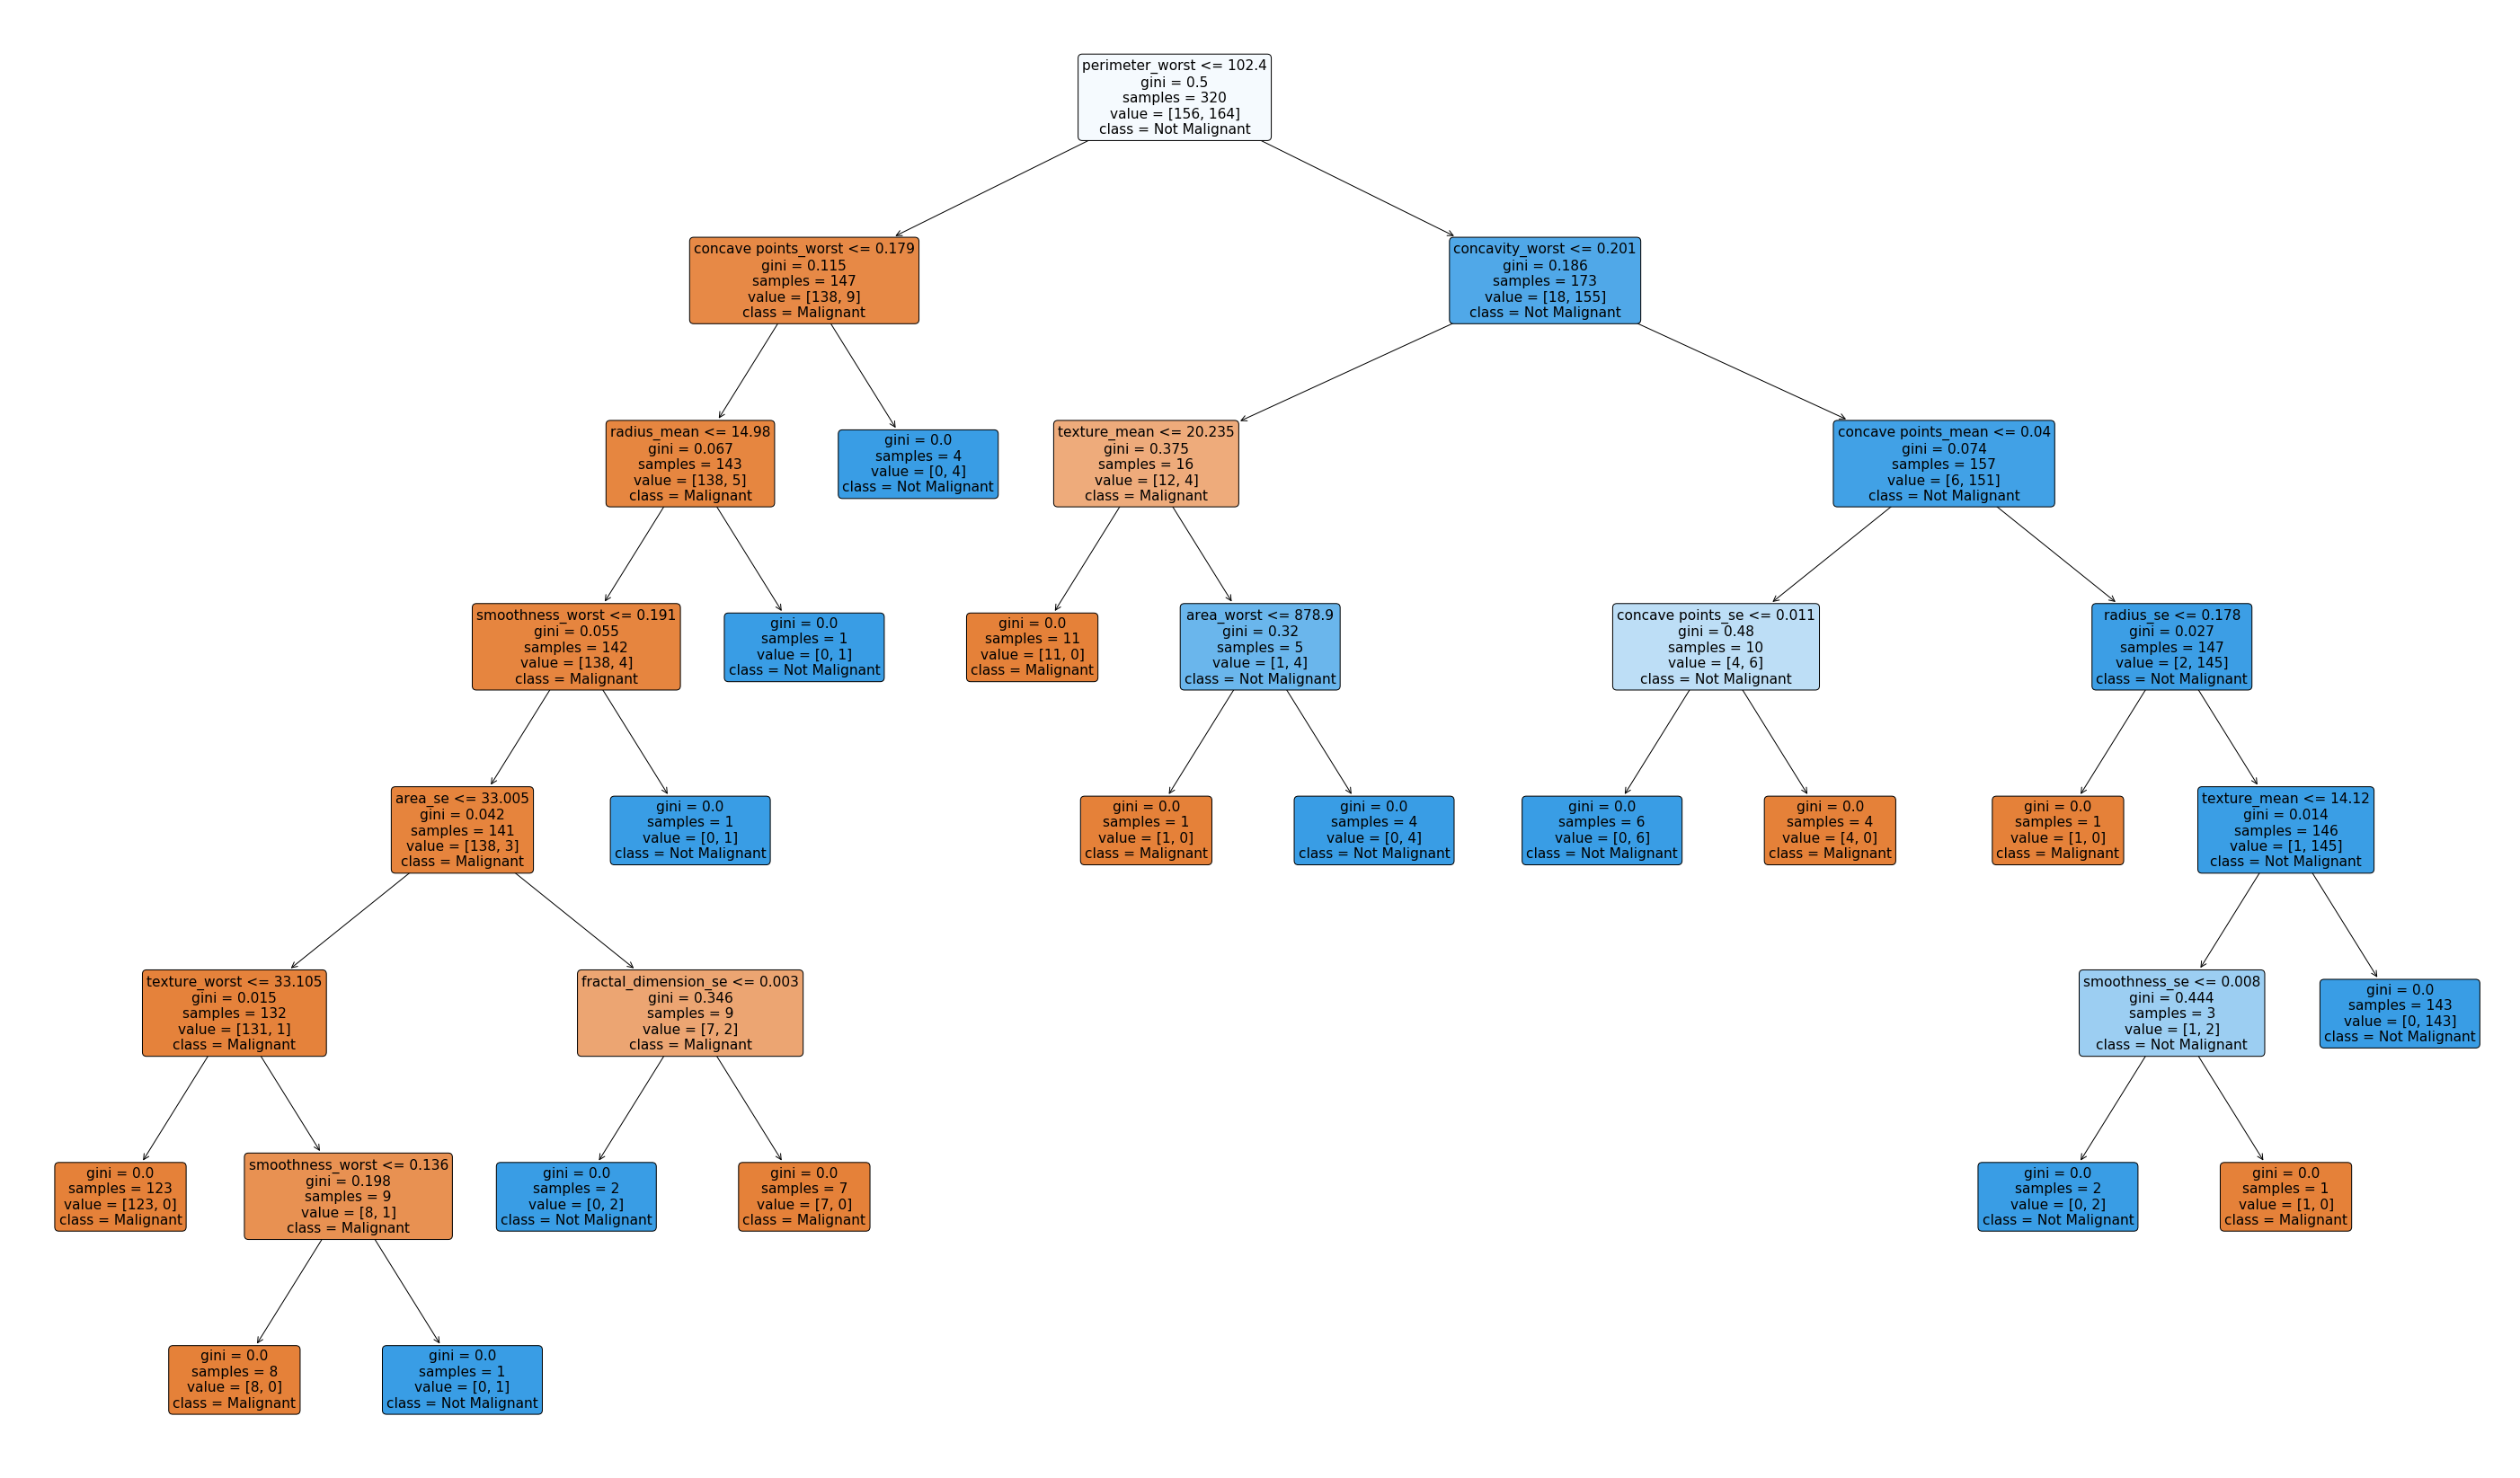

In [30]:
plt.figure(figsize=(50,30))
tree.plot_tree(clf,rounded=True,filled=True,class_names=['Malignant','Not Malignant'],feature_names=X.columns);

In [31]:
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [32]:
print(y_test)

196    1
45     1
293    0
264    1
227    0
      ..
161    1
201    1
460    1
58     0
132    1
Name: diag_target, Length: 80, dtype: int64


In [33]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [34]:
y_pred=y_pred.ravel()

In [35]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

### Checking the shape 

In [36]:
y_pred.shape

(80,)

### Checking the accuracy and classification report of the model

In [37]:
print('Accuracy:{} '.format(accuracy_score(y_test,y_pred)))
print('Classification Report:\n {}'.format(classification_report(y_test,y_pred)))

Accuracy:0.9125 
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.92        44
           1       0.85      0.97      0.91        36

    accuracy                           0.91        80
   macro avg       0.91      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



The Accuracy Score of Decision Tree Classifier is 0.912.
It can be discerned from the above classification report that the precision for both the classes are very close to each other so as the recall. The F1 score is very much close to 1 which states excellent precision and recall.

### Analyzing the performance of the Classfication Model using Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix: \n {}'.format(confusion_matrix(y_test,y_pred)))

Confusion Matrix: 
 [[38  6]
 [ 1 35]]


There are two possible target classes: **"1"** and **"0"**. 1 = Malignant (indicates prescence of cancer cells) and 0 = Benign (indicating absence of cancer cells).

The classifier made a total of **80** predictions (i.e 80 patients were being tested for the presence of breast cancer).
Out of those 80 cases, the classifier predicted "yes" **44** times, and "no" **36** times.
In reality, 39 patients in the sample have the disease, and 41 patients do not.

Rates as computed from the confusion matrix:<br/>
- **<u>Accuracy</u>**: Overall, how often is the classifier correct?

(TP+TN)/total = (38+35)/80 = 0.91

- **<u>Misclassification Rate</u>**: Overall, how often is it wrong?

(FP+FN)/total = (6+1)/80 = 0.0875 equivalent to 1-Accuracy also known as *"Error Rate"*

- **<u>True Positive Rate</u>**: When it's actually yes, how often does it predict 1?

TP/actual yes = 38/41 = 0.926 also known as "Sensitivity" or *"Recall"*

- **<u>False Positive Rate</u>**: When it's actually 0, how often does it predict 1?

FP/actual no = 6/41 = 0.1463<br/>
- **<u>Specificity</u>**: When it's actually 0, how often does it predict 0? also known as true negative rate<br/><br/>

- **<u>False Negative Rate</u>**: When it's actually yes, how often does it predict 0?<br/>
FNR = FN/(FN+TP)=1/(1+38)= 0.0256

TN/actual no = 35/41 = 0.853 equivalent to 1-False Positive Rate<br/>
- **<u>Precision</u>**: When it predicts 1, how often is it correct?

TP/predicted yes = 38/44 = 0.863
- **<u>Prevalence</u>**: How often does the yes condition actually occur in our sample?

actual yes/total = 39/80 = 0.4875

### Visualization using Plot Confusion Matrix

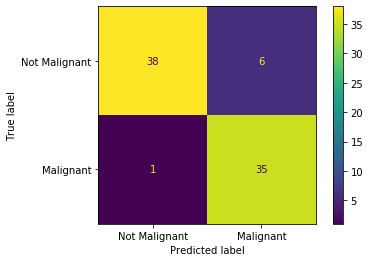

In [39]:
plot_confusion_matrix(clf, X_test,y_test,values_format='d',
                     display_labels=["Not Malignant","Malignant"])

### ROC_AUC (Receiver Operating Characteristics) and Area Under The Curve 

In [40]:
from sklearn.metrics import roc_auc_score
print('ROC-AUC Score: {}'.format(roc_auc_score(y_test,y_pred)))

ROC-AUC Score: 0.9179292929292929


#### Importing the libraries and calculating the performance metrics: Precision and Recall

In [41]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print('Precision Score: {}'.format(precision_score(y_test,y_pred)))
print('Recall Score: {}'.format(recall_score(y_test,y_pred)))

Precision Score: 0.8536585365853658
Recall Score: 0.9722222222222222


The above result depicts that the Recall Score is 0.972 which is a very good score.
Recall score or Sensitivity is very important to consider in this case as it helps us to understand that  out of the total actual positive cases how many of them have been correctly predicted by the model.

### Calculating Log_Loss which is the loss function of a regression model

In [42]:
from sklearn.metrics import log_loss

In [43]:
print('Log Loss: {}'.format(log_loss(y_test,y_pred)))

Log Loss: 3.02220290436195


### Calculating F1-Score

In [44]:
from sklearn.metrics import f1_score
print('F1 Score: {}'.format(f1_score(y_test,y_pred)))

F1 Score: 0.9090909090909091


The above result depicts that the F1 score is 0.909. F1 Score is used when we want a balance beteen FP and FN and it is the harmonic mean of Precision and Recall

It is important to consider FN rather than FP in this problem. So we are considering β=2

In [45]:
from sklearn.metrics import fbeta_score
print('F2 Score: {}'.format(fbeta_score(y_test,y_pred,beta=2)))

F2 Score: 0.945945945945946


### Plotting the ROC-AUC curve for better visualization
The ROC_AUC Score calculated above is 0.919 which infers that the classifier has a very good ability to make distinctions among the classes.

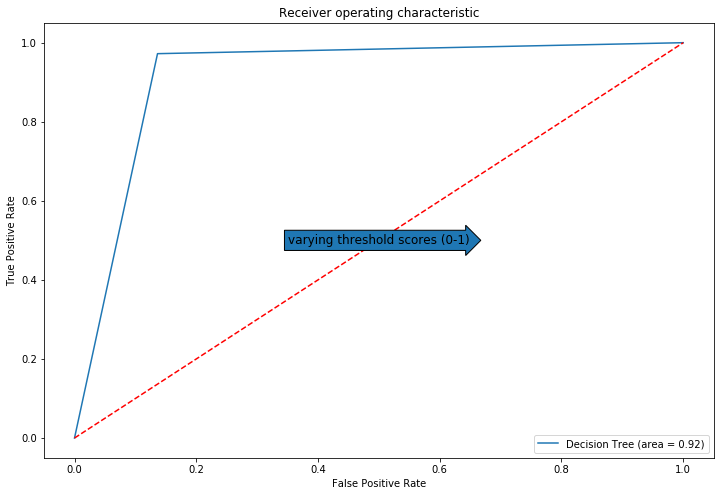

In [46]:
from sklearn.metrics import roc_curve 
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1]) 
plt.figure(figsize = (12,8)) 
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % (roc_auc_score(y_test,y_pred)))
plt.plot([0, 1], [0, 1],'r--') 
plt.text(0.5, 0.5, "varying threshold scores (0-1)", rotation=0, size=12,ha="center", va="center",bbox=dict(boxstyle="rarrow"))
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver operating characteristic') 
plt.legend(loc="lower right") 
plt.savefig('DTree_ROC') 
plt.show()

# Logistic Regression 

In [47]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
y_pred_clf=clf.predict(X_test)
y_pred_clf

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [49]:
print(y_test)

196    1
45     1
293    0
264    1
227    0
      ..
161    1
201    1
460    1
58     0
132    1
Name: diag_target, Length: 80, dtype: int64


In [50]:
y_pred_clf

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [51]:
y_pred.shape

(80,)

In [52]:
print('Accuracy:{} '.format(accuracy_score(y_test,y_pred_clf)))
print('Classification Report:\n {}'.format(classification_report(y_test,y_pred_clf)))

Accuracy:0.95 
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        44
           1       0.90      1.00      0.95        36

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.96      0.95      0.95        80



In [53]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix: \n {}'.format(confusion_matrix(y_test,y_pred_clf)))

Confusion Matrix: 
 [[40  4]
 [ 0 36]]


The classifier made a total of **80** predictions (i.e 80 patients were being tested for the presence of breast cancer).
Out of those 80 cases, the classifier predicted "yes" **44** times, and "no" **36** times.
In reality, 39 patients in the sample have the disease, and 41 patients do not.

Rates as computed from the confusion matrix:<br/>
- **<u>Accuracy</u>**: Overall, how often is the classifier correct?

(TP+TN)/total = (38+35)/80 = 0.91

- **<u>Misclassification Rate</u>**: Overall, how often is it wrong?

(FP+FN)/total = (6+1)/80 = 0.0875 equivalent to 1-Accuracy also known as *"Error Rate"*

- **<u>True Positive Rate</u>**: When it's actually yes, how often does it predict 1?

TP/actual yes = 38/41 = 0.926 also known as "Sensitivity" or *"Recall"*

- **<u>False Positive Rate</u>**: When it's actually 0, how often does it predict 1?

FP/actual no = 6/41 = 0.1463<br/>
- **<u>Specificity</u>**: When it's actually 0, how often does it predict 0? also know as true negative rate<br/><br/>
- **<u>False Negative Rate</u>**: When it's actually 1, how often does it predict 0?
FNR = FN/(FN+TP)=0

TN/actual no = 35/41 = 0.853 equivalent to 1-False Positive Rate<br/>
- **<u>Precision</u>**: When it predicts 1, how often is it correct?

TP/predicted yes = 38/44 = 0.863
- **<u>Prevalence</u>**: How often does the yes condition actually occur in our sample?

actual yes/total = 39/80 = 0.4875

In [54]:
print('ROC-AUC Score: {}'.format(roc_auc_score(y_test,y_pred_clf)))

ROC-AUC Score: 0.9545454545454545


In [55]:
print('Precision Score: {}'.format(precision_score(y_test,y_pred_clf)))
print('Recall Score: {}'.format(recall_score(y_test,y_pred_clf)))

Precision Score: 0.9
Recall Score: 1.0


Precision Score is 0.9 which lineates that out of the cases that have been predicted by the model, 90% of the cases have been truely predicted.
Recall Score/True Positive Rate/Sensitivity is 1 that shows that out of the actual positive cases, 100% of the cases have been truely predicted by the model.

In [56]:
print('Log Loss: {}'.format(log_loss(y_test,y_pred_clf)))

Log Loss: 1.726978799617045


In [57]:
print('F2 Score for Logistic Regression: {}'.format(fbeta_score(y_test,y_pred_clf,beta=2)))

F2 Score for Logistic Regression: 0.9782608695652175


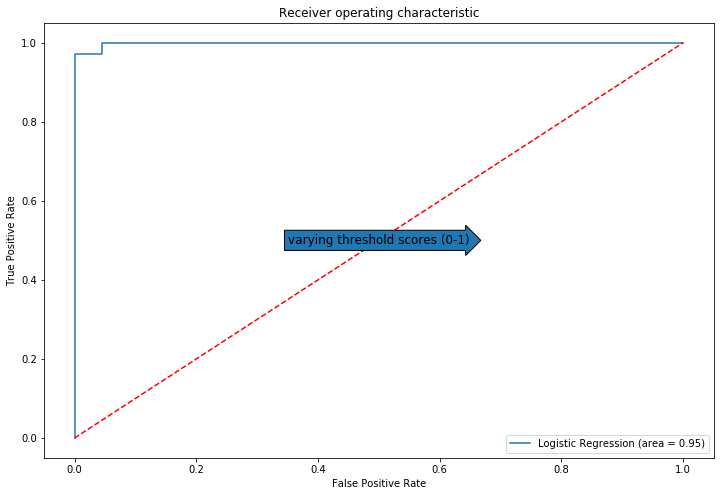

In [58]:
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1]) 
plt.figure(figsize = (12,8)) 
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % (roc_auc_score(y_test,y_pred_clf)))
plt.plot([0, 1], [0, 1],'r--') 
plt.text(0.5, 0.5, "varying threshold scores (0-1)", rotation=0, size=12,ha="center", va="center",bbox=dict(boxstyle="rarrow"))
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver operating characteristic') 
plt.legend(loc="lower right") 
plt.savefig('Logistic_ROC') 
plt.show()

# Naive Bayes

The above figure depicts the ROC-AUC Curve and the ROC-AUC score is 0.95 which means that the model is excellent in differentiating the classes.

In [59]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [60]:
y_pred_nb=nb.predict(X_test)
y_pred_nb

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [61]:
print('Accuracy: {}'.format(accuracy_score(y_test,y_pred_nb)))
print('\n')
print('Classification Report:\n {}'.format(classification_report(y_test,y_pred_nb)))

Accuracy: 0.9625


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97        44
           1       0.95      0.97      0.96        36

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



In [62]:
print('Confusion Matrix: \n {}'.format(confusion_matrix(y_test,y_pred_nb)))

Confusion Matrix: 
 [[42  2]
 [ 1 35]]


The classifier made a total of 80 predictions (i.e 80 patients were being tested for the presence breast cancer).
Out of those 80 cases, the classifier predicted "yes" 44 times, and "no" 36 times.<br/>
In reality, 43 patients in the sample have the disease, and 37 patients do not.<br/>
Rates as computed from the confusion matrix:<r>
- **<u>Accuracy<u/>**: Overall, how often is the classifier correct?

(TP+TN)/total = (42+3)/80 = 0.5625<br/>
- **<u>Misclassification Rate</u>**: Overall, how often is it wrong?

(FP+FN)/total = (2+35)/80 = 0.4625 equivalent to 1 minus Accuracy also known as *"Error Rate"*<br/>
- **<u>True Positive Rate</u>**: When it's actually yes, how often does it predict 1?

TP/actual yes = 42/43 = 0.9767 also known as "Sensitivity" or *"Recall"*<br/>
- **<u>False Positive Rate</u>**: When it's actually 0, how often does it predict 1?

FP/actual no = 2/37 = 0.054<br/>
- **<u>Specificity</u>**: When it's actually 0, how often does it predict 0? also known as true negative rate

TN/actual no = 35/37 = 0.945 equivalent to 1 minus False Positive Rate <br/>
- **<u>False Negative Rate</u>**: When it's actually 1, how often does it predict 0?<br/>
FNR = FN/(FN+TP)=1/(1+42)=0.023<br/><br/>
- **<u>Precision<u/>**: When it predicts 1, how often is it correct?

TP/predicted yes = 42/44 = 0.954
- **<u>Prevalence<u/>**: How often does the yes condition actually occur in our sample?

actual yes/total = 43/80 = 0.5375

In [63]:
print('Precision Score: {}'.format(precision_score(y_test,y_pred_nb)))
print('Recall Score: {}'.format(recall_score(y_test,y_pred_nb)))

Precision Score: 0.9459459459459459
Recall Score: 0.9722222222222222


Precision Score is 0.945 which infers that out of the cases that have been predicted by the model, 94.5% of the cases have been truely predicted.
Recall Score/True Positive Rate/Sensitivity is 0.972 that shows that out of the actual positive cases, 97.22% of the cases have been truely predicted by the model.

In [64]:
print('ROC-AUC Score: {}'.format(roc_auc_score(y_test,y_pred_nb)))

ROC-AUC Score: 0.9633838383838385


In [65]:
from sklearn.metrics import log_loss
print('Log Loss: {}'.format(log_loss(y_test,y_pred_nb)))

Log Loss: 1.2952241047449062


Log Loss value is 1.29 which is very low. Less the value of the Log Loss, better the model is.

In [66]:
from sklearn.metrics import f1_score
print('F1 Score: {}'.format(f1_score(y_test,y_pred_nb)))

F1 Score: 0.9589041095890412


In [67]:
print('F2 Score: {}'.format(fbeta_score(y_test,y_pred,beta=2)))

F2 Score: 0.945945945945946


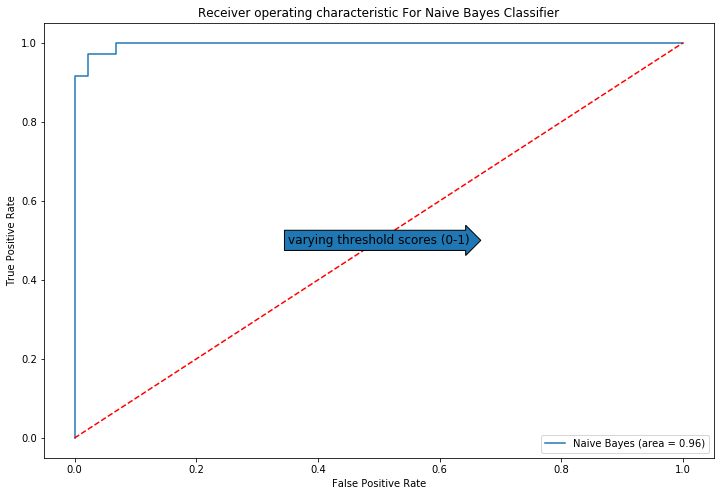

In [68]:
from sklearn.metrics import roc_curve 
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1]) 
plt.figure(figsize = (12,8)) 
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % (roc_auc_score(y_test,y_pred_nb)))
plt.plot([0, 1], [0, 1],'r--') 
plt.text(0.5, 0.5, "varying threshold scores (0-1)", rotation=0, size=12,ha="center", va="center",bbox=dict(boxstyle="rarrow"))
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver operating characteristic For Naive Bayes Classifier') 
plt.legend(loc="lower right") 
plt.savefig('Naive_Bayes_ROC') 
plt.show()

# Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,random_state=42,oob_score=True) #object creation
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [70]:
y_pred_rf=model.predict(X_test)
y_pred_rf

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [71]:
y_test

196    1
45     1
293    0
264    1
227    0
      ..
161    1
201    1
460    1
58     0
132    1
Name: diag_target, Length: 80, dtype: int64

In [72]:
print('Confusion Matrix: \n {}'.format(confusion_matrix(y_test,y_pred_rf)))

Confusion Matrix: 
 [[39  5]
 [ 0 36]]


The classifier made a total of **80** predictions (i.e 80 patients were being tested for the presence of breast cancer).
Out of those 80 cases, the classifier predicted "yes" **44** times, and "no" **36** times.
In reality, 39 patients in the sample have the disease, and 41 patients do not.

Rates as computed from the confusion matrix:<br/>
- **<u>Accuracy</u>**: Overall, how often is the classifier correct?

(TP+TN)/total = (39+36)/80 = 0.9375

- **<u>Misclassification Rate</u>**: Overall, how often is it wrong?

(FP+FN)/total = (5+0)/80 = 0.0625 equivalent to 1-Accuracy also known as *"Error Rate"*

- **<u>True Positive Rate</u>**: When it's actually yes, how often does it predict 1?

TP/actual yes = 39/39 = 1 also known as "Sensitivity" or *"Recall"*

- **<u>False Positive Rate</u>**: When it's actually 0, how often does it predict 1?

FP/actual no = 5/41 = 0.1219<br/>
- **<u>Specificity</u>**: When it's actually 0, how often does it predict 0? also know as true negative rate

TN/actual no = 36/41 = 0.8780 equivalent to 1-False Positive Rate<br/>

- **<u>False Negative Rate</u>**: When it's actually yes, how often does it predict 0?<br/>
FNR = FN/(FN+TP)=0<br/><br/>

- **<u>Precision</u>**: When it predicts 1, how often is it correct?

TP/predicted yes = 39/44 = 0.8863
- **<u>Prevalence</u>**: How often does the yes condition actually occur in our sample?

actual yes/total = 39/80 = 0.4875

In [73]:
print('Accuracy: {}'.format(accuracy_score(y_test,y_pred_rf)))
print('\n')
print('Classification Report:\n {}'.format(classification_report(y_test,y_pred_rf)))

Accuracy: 0.9375


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        44
           1       0.88      1.00      0.94        36

    accuracy                           0.94        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.95      0.94      0.94        80



In [74]:
print('Precision Score: {}'.format(precision_score(y_test,y_pred_rf)))
print('Recall Score: {}'.format(recall_score(y_test,y_pred_rf)))

Precision Score: 0.8780487804878049
Recall Score: 1.0


In [75]:
print('ROC-AUC Score: {}'.format(roc_auc_score(y_test,y_pred_rf)))

ROC-AUC Score: 0.9431818181818181


In [76]:
print('Log Loss: {}'.format(log_loss(y_test,y_pred_rf)))

Log Loss: 2.158723499521306


Log Loss value is 2.158 which is a bit high. 

In [77]:
print('F1 Score: {}'.format(f1_score(y_test,y_pred_rf)))

F1 Score: 0.9350649350649352


In [78]:
print('F2 Score: {}'.format(fbeta_score(y_test,y_pred_rf,beta=2)))

F2 Score: 0.9729729729729731


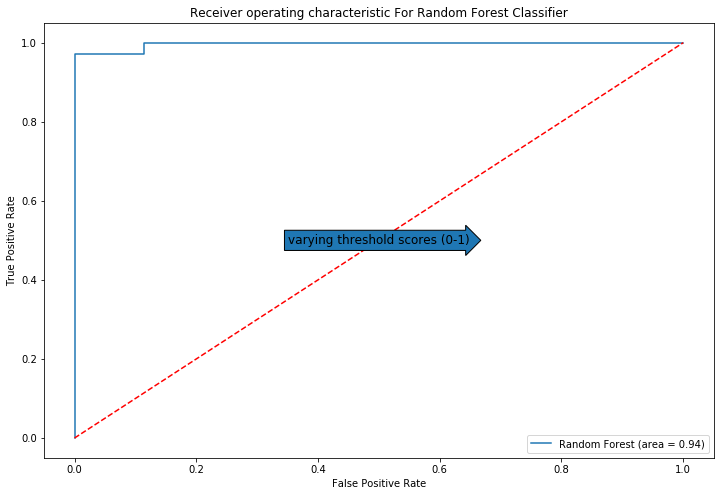

In [79]:
from sklearn.metrics import roc_curve 
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1]) 
plt.figure(figsize = (12,8)) 
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % (roc_auc_score(y_test,y_pred_rf)))
plt.plot([0, 1], [0, 1],'r--') 
plt.text(0.5, 0.5, "varying threshold scores (0-1)", rotation=0, size=12,ha="center", va="center",bbox=dict(boxstyle="rarrow"))
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver operating characteristic For Random Forest Classifier') 
plt.legend(loc="lower right") 
plt.savefig('Random_Forest_ROC') 
plt.show()

# Support Vector Machine

In [80]:
from sklearn.svm import SVC

In [81]:
clf=SVC(kernel='linear')

In [82]:
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [83]:
y_pred_svm=clf.predict(X_test)
y_pred_svm

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [84]:
print('Accuracy:{} '.format(accuracy_score(y_test,y_pred_svm)))
print('Classification Report:\n {}'.format(classification_report(y_test,y_pred_svm)))

Accuracy:0.9625 
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        44
           1       0.92      1.00      0.96        36

    accuracy                           0.96        80
   macro avg       0.96      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80



The accuracy score of the model is 0.96.

In [85]:
print('Confusion Matrix: \n {}'.format(confusion_matrix(y_test,y_pred_svm)))

Confusion Matrix: 
 [[41  3]
 [ 0 36]]


The classifier made a total of **80** predictions (i.e 80 patients were being tested for the presence of breast cancer).
Out of those 80 cases, the classifier predicted "yes" **44** times, and "no" **36** times.
In reality, 41 patients in the sample have the disease, and 39 patients do not.

Rates as computed from the confusion matrix:<br/>
- **<u>Accuracy</u>**: Overall, how often is the classifier correct?

(TP+TN)/total = (39+36)/80 = 0.9375

- **<u>Misclassification Rate</u>**: Overall, how often is it wrong?

(FP+FN)/total = (5+0)/80 = 0.0625 equivalent to 1-Accuracy also known as *"Error Rate"*

- **<u>True Positive Rate</u>**: When it's actually yes, how often does it predict 1?

TP/actual yes = 39/39 = 1 also known as "Sensitivity" or *"Recall"*

- **<u>False Positive Rate</u>**: When it's actually 0, how often does it predict 1?

FP/actual no = 5/41 = 0.1219<br/>
- **<u>Specificity</u>**: When it's actually 0, how often does it predict 0? also known as true negative rate

TN/actual no = 36/41 = 0.8780 equivalent to 1-False Positive Rate<br/>

- **<u>False Negative Rate</u>**: When it's actually yes, how often does it predict 0?<br/>
FNR = FN/(FN+TP)=0<br/><br/>

- **<u>Precision</u>**: When it predicts 1, how often is it correct?

TP/predicted yes = 39/44 = 0.8863
- **<u>Prevalence</u>**: How often does the yes condition actually occur in our sample?

actual yes/total = 39/80 = 0.4875

In [86]:
print('ROC-AUC Score: {}'.format(roc_auc_score(y_test,y_pred_svm)))

ROC-AUC Score: 0.9659090909090909


In [87]:
print('Precision Score: {}'.format(precision_score(y_test,y_pred_svm)))
print('Recall Score: {}'.format(recall_score(y_test,y_pred_svm)))

Precision Score: 0.9230769230769231
Recall Score: 1.0


Precision Score is 0.92 which signifies that out of the cases that have been predicted by the model, 92% of the cases have been truely predicted.

Recall Score/True Positive Rate/Sensitivity is 1 that entails that out of the actual positive cases, 100% of the cases have been truely predicted by the model.

In [88]:
print('Log Loss: {}'.format(log_loss(y_test,y_pred_svm)))

Log Loss: 1.2952340997127838


Log Loss value is 1.295 which is low. 

In [89]:
print('F1 Score: {}'.format(f1_score(y_test,y_pred_svm)))

F1 Score: 0.9600000000000001


F1 Score is 0.96 which is good if we want a balance between FPR(False Positive Rate) and FNR(False Negative Rate)

In [90]:
print('F2 Score: {}'.format(fbeta_score(y_test,y_pred_svm,beta=2)))

F2 Score: 0.9836065573770493


F2 Score is 0.98 which is good when we are empasizing on FNR(False Negative Rate) rather than FPR(False Positive Rate). Here we are focusing on FNR so we have selected the value of beta=2.

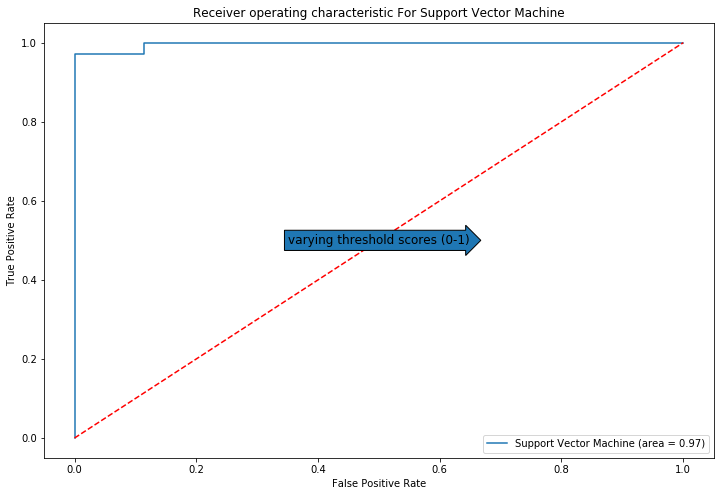

In [91]:
from sklearn.metrics import roc_curve 
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1]) 
plt.figure(figsize = (12,8)) 
plt.plot(fpr, tpr, label='Support Vector Machine (area = %0.2f)' % (roc_auc_score(y_test,y_pred_svm)))
plt.plot([0, 1], [0, 1],'r--') 
plt.text(0.5, 0.5, "varying threshold scores (0-1)", rotation=0, size=12,ha="center", va="center",bbox=dict(boxstyle="rarrow"))
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver operating characteristic For Support Vector Machine') 
plt.legend(loc="lower right") 
plt.savefig('Support_Vector_Macine_ROC') 
plt.show()

### The above figure entails that the AUC-ROC for Support Vector Machine is 0.97 that means the model is able to differentiate between the classes very well.

# K Nearest Neighbors

In [92]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

In [93]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [94]:
y_pred_knn=knn_model.predict(X_test)
y_pred_knn

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [95]:
print('Accuracy:{} '.format(accuracy_score(y_test,y_pred_knn)))
print('Classification Report:\n {}'.format(classification_report(y_test,y_pred_knn)))

Accuracy:0.925 
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.93        44
           1       0.86      1.00      0.92        36

    accuracy                           0.93        80
   macro avg       0.93      0.93      0.92        80
weighted avg       0.94      0.93      0.93        80



The accuracy score of KNearest Neighbor Classifier is 0.925

In [96]:
print('Confusion Matrix: \n {}'.format(confusion_matrix(y_test,y_pred_knn)))

Confusion Matrix: 
 [[38  6]
 [ 0 36]]


The classifier made a total of 80 predictions (i.e 80 patients were being tested for the presence breast cancer).
Out of those 80 cases, the classifier predicted "yes" 44 times, and "no" 36 times.
In reality, 64 patients in the sample have the disease, and 107 patients do not.<br>
Rates as computed from the confusion matrix:<br>
- **<u>Accuracy</u>**: Overall, how often is the classifier correct?

(TP+TN)/total = (42+3)/80 = 0.5625
- **<u>Misclassification Rate</u>**: Overall, how often is it wrong?

(FP+FN)/total = (2+35)/80 = 0.4625 equivalent to 1 minus Accuracy also known as *"Error Rate"*
- **<u>True Positive Rate</u>**: When it's actually yes, how often does it predict 1?

TP/actual yes = 42/43 = 0.9767 also known as "Sensitivity" or *"Recall"*
- **<u>False Positive Rate</u>**: When it's actually 0, how often does it predict 1?

FP/actual no = 2/37 = 0.054
- **<u>Specificity</u>**: When it's actually 0, how often does it predict 0? also know as true negative rate

TN/actual no = 35/37 = 0.945 equivalent to 1 minus False Positive Rate<br/>
- **<u>False Negative Rate</u>**: When it's actually yes, how often does it predict 0?<br/>
FNR = FN/(FN+TP)=0 <br/><br/>
- **<u>Precision</u>**: When it predicts 1, how often is it correct?

TP/predicted yes = 42/44 = 0.954
- **<u>Prevalence</u>**: How often does the yes condition actually occur in our sample?

actual yes/total = 43/80 = 0.5375

In [97]:
print('ROC-AUC Score: {}'.format(roc_auc_score(y_test,y_pred_knn)))

ROC-AUC Score: 0.9318181818181819


In [98]:
print('Precision Score: {}'.format(precision_score(y_test,y_pred_knn)))
print('Recall Score: {}'.format(recall_score(y_test,y_pred_knn)))

Precision Score: 0.8571428571428571
Recall Score: 1.0


Precision Score is 0.8571 which signifies that out of the cases that have been predicted by the model, 85.7% of the cases have been truely predicted.

Recall Score/True Positive Rate/Sensitivity is 1 that entails that out of the actual positive cases, 100% of the cases have been truely predicted by the model.

In [99]:
print('Log Loss: {}'.format(log_loss(y_test,y_pred_knn)))

Log Loss: 2.5904681994255667


In [100]:
print('F1 Score: {}'.format(f1_score(y_test,y_pred_knn)))

F1 Score: 0.923076923076923


The F1 score of the model is 0.923 which is pretty good.

In [101]:
print('F2 Score: {}'.format(fbeta_score(y_test,y_pred_knn,beta=2)))

F2 Score: 0.9677419354838709


The F2 score of the model is 0.9677.

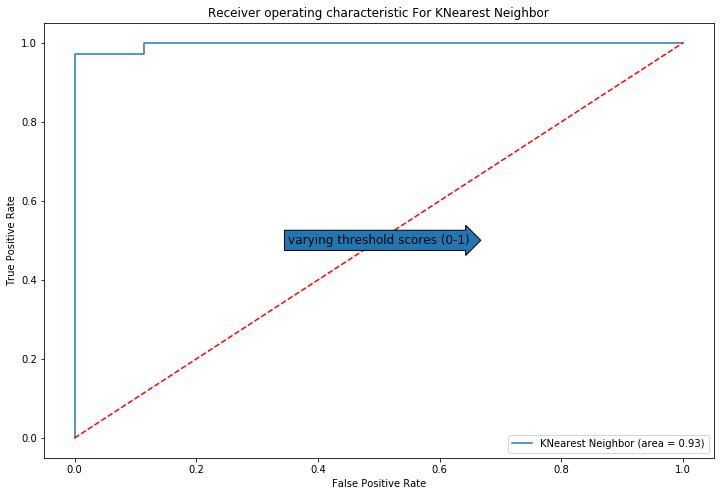

In [102]:
from sklearn.metrics import roc_curve 
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1]) 
plt.figure(figsize = (12,8)) 
plt.plot(fpr, tpr, label='KNearest Neighbor (area = %0.2f)' % (roc_auc_score(y_test,y_pred_knn)))
plt.plot([0, 1], [0, 1],'r--') 
plt.text(0.5, 0.5, "varying threshold scores (0-1)", rotation=0, size=12,ha="center", va="center",bbox=dict(boxstyle="rarrow"))
plt.xlabel('False Positive Rate(1-specificity)') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver operating characteristic For KNearest Neighbor') 
plt.legend(loc="lower right") 
plt.savefig('KNearest Neighbor_ROC') 
plt.show()

The above figure depicts the ROC-AUC Curve and the ROC-AUC score is 0.93 that entails that the model is good in differentiating the classes.

### Observation about ROC-AUC Curve

The plot of TPF (sensitivity) versus FPF (1-specificity) across varying cut-offs generates a curve in the unit square called an ROC curve. 

As a baseline, a random classifier is expected to give points lying along the diagonal (FPR = TPR) which is the red dotted line.

1.For proper interpretation of the ROC Curve, we will be considering the points that lie along the diagonal and their actual representation. For these situations, there is an equal chance of "+" and "-" happening. Therefore, this is not that different from making a prediction by tossing of an unbiased coin. Put simply, the classification model is random.

2.For the points above the diagonal, tpr > fpr, and the model states that this is the area where it is performing better than random. For example, let us assume tpr = 0.90 and fpr = 0.1, Then, the probability of being in the true positive group is (0.90/(.90+0.1))=90%.

Furthermore, keeping fpr constant, classifiers that give curves closer to the top-left corner indicate a better performance and better the classification model is.

### Inference

The above results have inferred that the accuracy of Support Vector Machine and Naive Bayes Algorithm is 0.9625 or 96% whereas 
Decision Tree has the lowest accuracy score of 0.9125 or 91.25%.<br/>
Again, with respect to True Positive Rate, the values of Support Vector Machine and Naive Bayes Algorithm are 0.9767 and 1 respectively. But, False Negative Rate of SVM is 0 whereas that of Naive Bayes is 0.023. <br/>
This can be discerned from the above result that we will select the **SVM model** for accurate predictive analysis of breast cancer classification.

